In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AAYUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv("cloths-rating.csv")
df

,ProductID,UserID,Rating,Text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl..."
...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m..."
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great


In [6]:
import string
def token_words(text):
    tokens=word_tokenize(text) 
    p=PorterStemmer()
    filtered=[]
    filtered_sentence=[]
    stop_words = set(stopwords.words('english'))
    for w in tokens:
        if w not in stop_words:
            filtered_sentence.append(w.lower())
    for i in filtered_sentence:
        filtered.append(p.stem(i))
    return filtered
df['filtered_text']=df['Text'].apply(token_words)
df

,ProductID,UserID,Rating,Text,filtered_text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]"
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]"
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]"
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]"
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f..."
...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w..."
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t..."
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ..."
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]"


In [7]:
import json
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

In [8]:
import re

def process_text(text):
    text=text.lower()
    text = re.sub(r"\d+", " ", str(text))
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    text = re.sub(r"\s+", " ", str(text))
    text = re.sub('&quot;'," ", text)
    text = re.sub(r"[^\w\s]", " ", str(text))
    stop_words = set(stopwords.words('english'))
    filtered_sentence = []
    for w in text:
        if w not in stop_words:
            filtered_sentence.append(w)
    return text
df['processed_text']= df['Text'].apply(process_text)
df

,ProductID,UserID,Rating,Text,filtered_text,processed_text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]",great taffy at great price
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]",absolutely wonderful silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]",love this dress it sooo pretty
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]",had such high hopes for this dress and really...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...",love love love this jumpsuit it fun flir...
...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w...",placed order soaps but have received withou...
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t...",the soap is ok for bathing no scent at all m...
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ...",for long time was searching for indian soap eq...
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]",good but not great


In [9]:
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
df['sentiment']= df['filtered_text'].apply(sentiment)
df

,ProductID,UserID,Rating,Text,filtered_text,processed_text,sentiment
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]",great taffy at great price,0.800000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]",absolutely wonderful silky and sexy and comf...,0.000000
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]",love this dress it sooo pretty,0.625000
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]",had such high hopes for this dress and really...,0.160000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...",love love love this jumpsuit it fun flir...,0.575000
...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w...",placed order soaps but have received withou...,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t...",the soap is ok for bathing no scent at all m...,0.266667
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ...",for long time was searching for indian soap eq...,-0.025000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]",good but not great,0.750000


In [14]:
df['Updated_score']=df['Rating']*df['sentiment']
df

,ProductID,UserID,Rating,Text,filtered_text,processed_text,sentiment,Updated_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]",great taffy at great price,0.800000,3.200000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]",absolutely wonderful silky and sexy and comf...,0.000000,0.000000
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]",love this dress it sooo pretty,0.625000,3.125000
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]",had such high hopes for this dress and really...,0.160000,0.480000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...",love love love this jumpsuit it fun flir...,0.575000,2.875000
...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w...",placed order soaps but have received withou...,0.000000,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t...",the soap is ok for bathing no scent at all m...,0.266667,0.800000
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ...",for long time was searching for indian soap eq...,-0.025000,-0.125000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]",good but not great,0.750000,2.250000


In [15]:
def classify_scores(rate):
    if rate<=0:
        return 1
    elif rate<=2:
        return 2
    elif rate<=3:
        return 3
    elif rate<=4:
        return 4
    elif rate<=5:
        return 5

df['New_score']=df['Updated_score'].apply(classify_scores)
df

,ProductID,UserID,Rating,Text,filtered_text,processed_text,sentiment,Updated_score,New_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]",great taffy at great price,0.800000,3.200000,4
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]",absolutely wonderful silky and sexy and comf...,0.000000,0.000000,1
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]",love this dress it sooo pretty,0.625000,3.125000,4
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]",had such high hopes for this dress and really...,0.160000,0.480000,2
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...",love love love this jumpsuit it fun flir...,0.575000,2.875000,3
...,...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w...",placed order soaps but have received withou...,0.000000,0.000000,1
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t...",the soap is ok for bathing no scent at all m...,0.266667,0.800000,2
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ...",for long time was searching for indian soap eq...,-0.025000,-0.125000,1
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]",good but not great,0.750000,2.250000,3


In [16]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['UserID']=le.fit_transform(df['UserID'])
#df['ProductID']=le.fit_transform(df['ProductID'])
#df

In [17]:
df_pivot=df.pivot_table(index='ProductID',columns='UserID',values='New_score').fillna(0)
df_pivot

UserID,AV1YnR7wglJLPUi8IJmi,AVpfIfGA1cnluZ0-emyp,AVpf_4sUilAPnD_xlwYV,AVpfpK8KLJeJML43BCuD,AVpftoij1cnluZ0-p5n2,AVpfwS_CLJeJML43DH5w,AVpgdkC8ilAPnD_xsvyi,AVph0EeEilAPnD_x9myq,AVphLY7v1cnluZ0-_Ty0,AVphgVaX1cnluZ0-DR74,...,B07MXKMWT5,B07NLR9YPZ,B07Q2B5Z9D,B07S55SML2,B07VYRQFBJ,B0818ZYVH1,B082KY37BL,B0832PGNNH,B08DLL7C2D,B08GWV3SM6
ProductID,,,,,,,,,,,,,,,,,,,,,
89,0.0,0.000000,0.000000,1.0,0.0,0.0,3.00,1.000000,2.000000,0.0,...,0.000000,2.00,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,2.75
333,0.0,1.500000,0.000000,0.0,0.0,3.0,0.00,0.000000,3.333333,1.0,...,0.000000,1.00,3.0,0.0,0.000000,1.500000,0.000000,0.000000,0.000000,0.00
369,4.0,2.000000,0.000000,2.0,0.0,1.0,1.00,3.000000,0.000000,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,2.333333,0.000000,4.000000,0.00
444,2.0,1.000000,0.000000,0.0,1.0,0.0,3.00,5.000000,2.000000,0.0,...,2.000000,0.00,2.5,0.0,0.000000,1.666667,0.000000,0.000000,2.666667,0.00
684,0.0,0.000000,3.000000,3.5,2.0,0.0,1.50,3.000000,2.000000,0.0,...,2.000000,0.00,5.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.50
697,0.0,1.000000,2.000000,0.0,0.0,0.0,4.00,0.000000,1.000000,1.0,...,3.000000,2.00,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.50
767,2.0,0.000000,0.000000,1.0,0.0,0.0,1.00,0.000000,0.000000,0.0,...,0.000000,1.00,0.0,0.0,4.000000,0.000000,1.000000,1.000000,0.000000,0.00
777,4.0,0.000000,0.000000,0.0,0.0,0.0,2.00,0.000000,0.000000,3.0,...,0.000000,2.00,0.0,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,0.00
823,0.0,0.000000,0.000000,4.0,0.0,0.0,5.00,1.000000,0.000000,0.0,...,0.000000,5.00,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,1.50


In [18]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values)
print(df_pivot_matrix)

  (0, 3)	1.0
  (0, 6)	3.0
  (0, 7)	1.0
  (0, 8)	2.0
  (0, 11)	1.0
  (0, 16)	2.5
  (0, 18)	3.0
  (0, 20)	1.0
  (0, 22)	4.0
  (0, 28)	3.0
  (0, 33)	2.0
  (0, 37)	3.0
  (0, 41)	2.75
  (1, 1)	1.5
  (1, 5)	3.0
  (1, 8)	3.3333333333333335
  (1, 9)	1.0
  (1, 10)	2.0
  (1, 13)	2.0
  (1, 17)	1.0
  (1, 22)	4.0
  (1, 25)	1.25
  (1, 29)	3.5
  (1, 33)	1.0
  (1, 34)	3.0
  :	:
  (25, 17)	4.0
  (25, 21)	2.0
  (25, 22)	1.0
  (25, 25)	2.0
  (25, 30)	3.0
  (25, 38)	2.0
  (25, 40)	1.0
  (26, 0)	2.0
  (26, 1)	2.0
  (26, 3)	2.0
  (26, 6)	1.0
  (26, 7)	2.5
  (26, 8)	1.5
  (26, 9)	1.0
  (26, 11)	2.0
  (26, 16)	2.0
  (26, 17)	1.4
  (26, 18)	2.6666666666666665
  (26, 19)	1.0
  (26, 22)	1.0
  (26, 23)	2.0
  (26, 25)	2.6666666666666665
  (26, 28)	2.5
  (26, 33)	2.75
  (26, 37)	1.75


In [19]:
!pip install cosine_similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
similarity_matrix=cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.38327169, 0.26615119, 0.35901374, 0.50413239,
        0.438535  , 0.17637401, 0.2514454 , 0.65090879, 0.26568665,
        0.14886947, 0.21415495, 0.51386585, 0.45872901, 0.2514153 ,
        0.0559108 , 0.29745488, 0.06315352, 0.20845561, 0.13510263,
        0.338011  , 0.22095633, 0.06060408, 0.        , 0.60837528,
        0.14203265, 0.64904914],
       [0.38327169, 1.        , 0.38033923, 0.23837443, 0.28529849,
        0.42209198, 0.14878455, 0.07345899, 0.17596986, 0.25652618,
        0.10538386, 0.2239532 , 0.31967265, 0.35093673, 0.31712257,
        0.20009354, 0.15303236, 0.09686305, 0.42629761, 0.        ,
        0.2042306 , 0.15641375, 0.19461992, 0.        , 0.34127578,
        0.31571825, 0.3211753 ],
       [0.26615119, 0.38033923, 1.        , 0.37919993, 0.20168132,
        0.26301951, 0.31580516, 0.42981767, 0.22035944, 0.35479577,
        0.10375717, 0.13859767, 0.28871796, 0.21092353, 0.18158286,
        0.3698868 , 0.01937188, 0.53284915, 0.2777

In [22]:
import numpy as np

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
model_knn= NearestNeighbors(metric='cosine',n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=1)

1. Data gathering
2. Data Analysis
3. data cleaning 
4. data pre processing 
    a. Encoding 
    b. Transformation
        b.1 Normalization
        b.2 Standardization
5. Feature selection
6. feature building
7. Model Building
8. Evaluation

In [54]:
n= int(input("How many recommendation you want:"))
productID = int(input('Enter ProductID:'))
data = df_pivot.index.to_list()
data

How many recommendation you want:6
Enter ProductID:333


[89,
 333,
 369,
 444,
 684,
 697,
 767,
 777,
 823,
 847,
 853,
 858,
 862,
 910,
 949,
 1002,
 1003,
 1049,
 1060,
 1065,
 1077,
 1080,
 1095,
 1120,
 6969,
 8001,
 9696]

In [55]:
query_index = data.index(productID)
print(query_index)

1


In [56]:
distance,indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors =n)
print(distance)
print(indices)

[[0.         0.57370239 0.57790802 0.61672831 0.61966077 0.64906327]]
[[ 1 18  5  0  2 13]]


In [57]:
type(distance)

numpy.ndarray

In [58]:
list(zip(distance.tolist()[0], indices.tolist()[0]))

[(0.0, 1),
 (0.5737023915168709, 18),
 (0.5779080217879952, 5),
 (0.6167283074255046, 0),
 (0.6196607689486915, 2),
 (0.6490632726673669, 13)]

In [59]:
i=df_pivot.index[indices.flatten()]
i

Int64Index([333, 1060, 697, 89, 369, 910], dtype='int64', name='ProductID')

In [60]:
d= distance.flatten()
d

array([0.        , 0.57370239, 0.57790802, 0.61672831, 0.61966077,
       0.64906327])

In [61]:
new = list(zip(i,d))
new

[(333, 0.0),
 (1060, 0.5737023915168709),
 (697, 0.5779080217879952),
 (89, 0.6167283074255046),
 (369, 0.6196607689486915),
 (910, 0.6490632726673669)]

In [62]:
pd.DataFrame(new)

,0,1
0,333,0.000000
1,1060,0.573702
2,697,0.577908
3,89,0.616728
4,369,0.619661
5,910,0.649063


In [34]:
def classify_sentiment(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    elif score>0:
        return 'positive'

df['status']= df['sentiment'].apply(classify_sentiment)
df

,ProductID,UserID,Rating,Text,filtered_text,processed_text,sentiment,Updated_score,New_score,status
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,"[great, taffi, great, price, .]",great taffy at great price,0.800000,3.200000,4,positive
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, -, silki, sexi, comfort]",absolutely wonderful silky and sexy and comf...,0.000000,0.000000,1,neutral
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,"[love, dress, !, 's, sooo, pretti, .]",love this dress it sooo pretty,0.625000,3.125000,4,positive
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, .]",had such high hopes for this dress and really...,0.160000,0.480000,2,positive
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f...",love love love this jumpsuit it fun flir...,0.575000,2.875000,3,positive
...,...,...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,"[i, place, order, 4+1, soaps.but, i, receiv, w...",placed order soaps but have received withou...,0.000000,0.000000,1,neutral
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...","[the, soap, ok, bath, ,, scent, ,, drier, ., t...",the soap is ok for bathing no scent at all m...,0.266667,0.800000,2,positive
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,"[for, long, time, i, search, indian, soap, equ...",for long time was searching for indian soap eq...,-0.025000,-0.125000,1,negative
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,"[good, great]",good but not great,0.750000,2.250000,3,positive


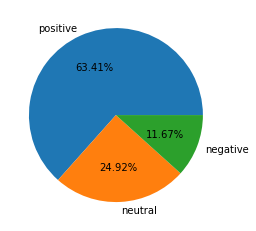

In [35]:
import matplotlib.pyplot as plt
status= df['status'].value_counts()
label =[]
plt.pie(status, labels=status.index.tolist(), autopct='%.2f%%')
plt.show()

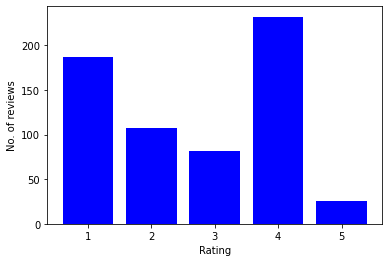

In [37]:
rating= df['New_score'].value_counts().tolist()
label= df['New_score'].unique().tolist()
plt.bar(label,rating,color='blue')
plt.xlabel("Rating")
plt.ylabel("No. of reviews")
plt.show()

In [ ]:
len(df.ProductID.unique())